Airbnb Data Analysis ‚Äî Part 1: Data Cleaning and Exploration

1. Data Loading

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# Load dataset (adjust path as needed)
df = pd.read_csv("listings.csv")

# Check structure of data
print("Shape:", df.shape)
print("\nColumn names:\n", df.columns.tolist())

# Preview top rows
display(df.head())

# Data info and summary
df.info()
df.describe(include='all')


Shape: (465, 79)

Column names:
 ['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_6

id                           listing_url       scrape_id last_scraped  \
0  2992450  https://www.airbnb.com/rooms/2992450  20250906174623   2025-09-06   
1  3820211  https://www.airbnb.com/rooms/3820211  20250906174623   2025-09-06   
2  5651579  https://www.airbnb.com/rooms/5651579  20250906174623   2025-09-06   
3  6623339  https://www.airbnb.com/rooms/6623339  20250906174623   2025-09-06   
4  9005989  https://www.airbnb.com/rooms/9005989  20250906174623   2025-09-06   

        source                                               name  \
0  city scrape                         Luxury 2 bedroom apartment   
1  city scrape  Funky Urban Gem: Prime Central Location - Park...   
2  city scrape         Large studio apt  by Capital Center & ESP@   
3  city scrape  Cozy City Stay ¬∑ Free Parking + Walkable Location   
4  city scrape     Studio in The heart of Center SQ, in Albany NY   

                                         description  \
0  The apartment is located in a quiet neighborho...   
1  Step into the charming and comfy 1BR/1BA apart...   
2  Spacious studio with hardwood floors, fully eq...   
3  Step into the charming and comfy 1BR/1BA apart...   
4  (21 years of age or older ONLY) NON- SMOKING.....   

                               neighborhood_overview  \
0                                                NaN   
1  Overview<br /><br />The lovely apartment is lo...   
2  The neighborhood is very eclectic. We have a v...   
3  Overview<br /><br />The lovely apartment is lo...   
4  There are many shops, restaurants, bars, museu...   

                                         picture_url   host_id  \
0  https://a0.muscache.com/pictures/44627226/0e72...   4621559   
1  https://a0.muscache.com/pictures/prohost-api/H...  19648678   
2  https://a0.muscache.com/pictures/b3fc42f3-6e5e...  29288920   
3  https://a0.muscache.com/pictures/prohost-api/H...  19648678   
4  https://a0.muscache.com/pictures/d242a77e-437c...  17766924   

                                     host_url host_name  host_since  \
0   https://www.airbnb.com/users/show/4621559   Kenneth  2013-01-07   
1  https://www.airbnb.com/users/show/19648678     Terra  2014-08-07   
2  https://www.airbnb.com/users/show/29288920     Gregg  2015-03-13   
3  https://www.airbnb.com/users/show/19648678     Terra  2014-08-07   
4  https://www.airbnb.com/users/show/17766924     Sugey  2014-07-07   

  host_location                                         host_about  \
0  New York, NY           I am a real down to earth & cool person.   
1    Albany, NY  Hello! I‚Äôm a proud resident of Albany, NY, whe...   
2    Albany, NY  I am an Albany native .I have lived in Ireland...   
3    Albany, NY  Hello! I‚Äôm a proud resident of Albany, NY, whe...   
4    Albany, NY                                                NaN   

  host_response_time host_response_rate host_acceptance_rate  \
0                NaN                NaN                  50%   
1     within an hour               100%                 100%   
2     within an hour               100%                  99%   
3     within an hour               100%                 100%   
4                NaN                NaN                 100%   

  host_is_superhost                                 host_thumbnail_url  \
0                 f  https://a0.muscache.com/im/users/4621559/profi...   
1                 t  https://a0.muscache.com/im/pictures/user/User/...   
2                 f  https://a0.muscache.com/im/users/29288920/prof...   
3                 t  https://a0.muscache.com/im/pictures/user/User/...   
4                 t  https://a0.muscache.com/im/pictures/user/ae311...   

                                    host_picture_url  \
0  https://a0.muscache.com/im/users/4621559/profi...   
1  https://a0.muscache.com/im/pictures/user/User/...   
2  https://a0.muscache.com/im/users/29288920/prof...   
3  https://a0.muscache.com/im/pictures/user/User/...   
4  https://a0.muscache.com/im/pictures/user/ae311...   

            hos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            465 non-null    int64  
 1   listing_url                                   465 non-null    object 
 2   scrape_id                                     465 non-null    int64  
 3   last_scraped                                  465 non-null    object 
 4   source                                        465 non-null    object 
 5   name                                          465 non-null    object 
 6   description                                   455 non-null    object 
 7   neighborhood_overview                         193 non-null    object 
 8   picture_url                                   465 non-null    object 
 9   host_id                                       465 non-null    int

id                                       listing_url  \
count   4.650000e+02                                               465   
unique           NaN                                               465   
top              NaN  https://www.airbnb.com/rooms/1503537470526077849   
freq             NaN                                                 1   
mean    8.231363e+17                                               NaN   
std     5.437113e+17                                               NaN   
min     2.992450e+06                                               NaN   
25%     5.412642e+07                                               NaN   
50%     9.506135e+17                                               NaN   
75%     1.288604e+18                                               NaN   
max     1.503537e+18                                               NaN   

           scrape_id last_scraped       source  \
count   4.650000e+02          465          465   
unique           NaN            1            2   
top              NaN   2025-09-06  city scrape   
freq             NaN          465          425   
mean    2.025091e+13          NaN          NaN   
std     4.692548e-02          NaN          NaN   
min     2.025091e+13          NaN          NaN   
25%     2.025091e+13          NaN          NaN   
50%     2.025091e+13          NaN          NaN   
75%     2.025091e+13          NaN          NaN   
max     2.025091e+13          NaN          NaN   

                                                     name  \
count                                                 465   
unique                                                463   
top     Funky Urban Gem: Prime Central Location - Park...   
freq                                                    3   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                              description  \
count                                                 455   
unique                                                402   
top     Welcome to your cozy Albany retreat! Enjoy a c...   
freq                                                    8   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                    neighborhood_overview  \
count                                                 193   
unique                                                151   
top     The Argus Hotel is located directly on Washing...   
freq                                                   11   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                              picture_url       host_id  \
count                                                 465  4.650000e+02   
unique                                                459           NaN   
top     https://a0.muscache.com/pictures/miso/Hosting-...           NaN   
freq                         

2. Data Cleaning

(a) Handle missing values

In [3]:
# Percentage of missing values
missing = df.isnull().mean().sort_values(ascending=False) * 100
display(missing.head(10))

# Drop columns with >50% missing values (optional)
df = df.loc[:, df.isnull().mean() < 0.5]

# Fill or drop missing values in key columns
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df = df.dropna(subset=['price', 'neighbourhood_cleansed', 'room_type'])


license                         100.000000
calendar_updated                100.000000
neighbourhood_group_cleansed    100.000000
neighbourhood                    58.494624
neighborhood_overview            58.494624
host_about                       46.451613
host_location                    26.236559
host_neighbourhood               17.419355
last_review                      13.118280
first_review                     13.118280
dtype: float64

(b) Remove duplicate rows

In [4]:
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]
print(f"Removed {before - after} duplicate rows")


Removed 0 duplicate rows


(c) Ensure correct data types

In [5]:
# Convert price to numeric
if 'price' in df.columns:
    df['price'] = df['price'].replace({'\$':'', ',':''}, regex=True).astype(float)

# Convert date columns if any
date_cols = [col for col in df.columns if 'date' in col.lower()]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Convert categorical columns
cat_cols = ['neighbourhood_cleansed', 'room_type', 'property_type']
for col in cat_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')


<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-646957427.py:3: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace({'\$':'', ',':''}, regex=True).astype(float)


3. Exploratory Data Analysis (EDA)

(a) Summary statistics

In [6]:
display(df.describe())

id     scrape_id       host_id  host_listings_count  \
count  4.250000e+02  4.250000e+02  4.250000e+02           425.000000   
mean   8.171373e+17  2.025091e+13  2.525206e+08            22.251765   
min    2.992450e+06  2.025091e+13  6.576000e+04             1.000000   
25%    5.356759e+07  2.025091e+13  4.762598e+07             2.000000   
50%    9.582000e+17  2.025091e+13  2.329679e+08             5.000000   
75%    1.292882e+18  2.025091e+13  4.338843e+08            15.000000   
max    1.503537e+18  2.025091e+13  7.105525e+08          1259.000000   
std    5.510365e+17  0.000000e+00  2.050910e+08           125.513211   

       host_total_listings_count    latitude   longitude  \
count                 425.000000  425.000000  425.000000   
mean                   37.889412   42.659403  -73.776611   
min                     1.000000   42.630660  -73.876490   
25%                     2.000000   42.652690  -73.787714   
50%                     7.000000   42.658400  -73.774690   
75%                    17.000000   42.666480  -73.763700   
max                  2675.000000   42.714900  -73.738250   
std                   259.908927    0.010289    0.018273   

                        accommodates   bathrooms    bedrooms        beds  \
count                            425  425.000000  425.000000  425.000000   
mean   1970-01-01 00:00:00.000000003    1.207059    1.534118    1.781176   
min    1970-01-01 00:00:00.000000001    0.000000    0.000000    0.000000   
25%    1970-01-01 00:00:00.000000002    1.000000    1.000000    1.000000   
50%    1970-01-01 00:00:00.000000002    1.000000    1.000000    1.000000   
75%    1970-01-01 00:00:00.000000004    1.000000    2.000000    2.000000   
max    1970-01-01 00:00:00.000000016    7.000000    9.000000   10.000000   
std                              NaN    0.593357    1.065934    1.250141   

             price  minimum_nights  maximum_nights  minimum_minimum_nights  \
count   425.000000      425.000000      425.000000              425.000000   
mean    111.378824        5.200000      493.828235                4.891765   
min      24.000000        1.000000        3.000000                1.000000   
25%      65.000000        1.000000      365.000000                1.000000   
50%      91.000000        2.000000      365.000000                1.000000   
75%     116.000000        3.000000      730.000000                3.000000   
max    1322.000000       70.000000     1125.000000               70.000000   
std     112.311477        8.809568      388.654241                8.459256   

       maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  \
count              425.000000              425.000000              425.000000   
mean                 5.567059              634.317647              655.992941   
min                  1.000000                1.000000                3.000000   
25%                  1.000000              365.000000              365.000000   
50%                  2.000000              365.000000              365.000000   
75%                  4.000000             1125.000000             1125.000000   
max                 70.000000             1125.000000             1125.000000   
std                  8.887709              432.218782              427.712192   

       minimum_nights_avg_ntm  maximum_nights_avg_ntm  availability_30  \
count              425.000000              425.000000       425.000000   
mean                 5.345647              651.825647        16.797647   
min                  1.000000                3.000000         0.000000   
25%                  1.000000              365.000000         6.000000   
50%                  2.000000              365.000000        19.000000   
75%                  3.000000             1125.000000        28.000000   
max                 70.000000             1125.000000        30.000000   
std                  8.781860              427.925072        11.088473   

       availability_60  availability_90  a

(b) Distribution of key variables

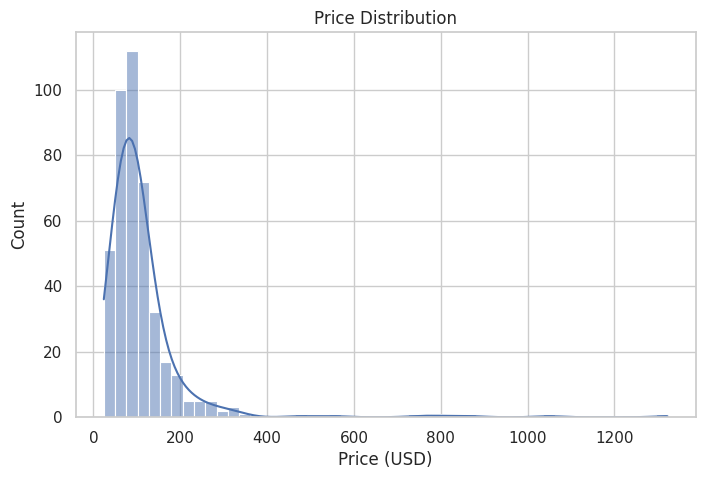

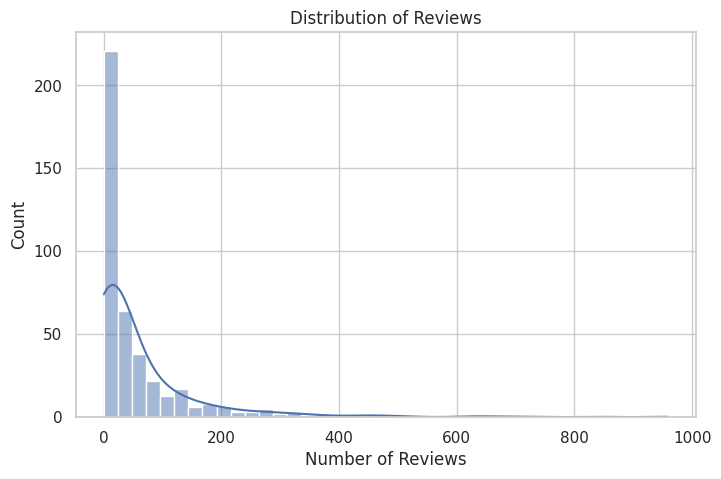

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price (USD)")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['number_of_reviews'], bins=40, kde=True)
plt.title("Distribution of Reviews")
plt.xlabel("Number of Reviews")
plt.show()


(c) Count of properties by neighborhood and room type

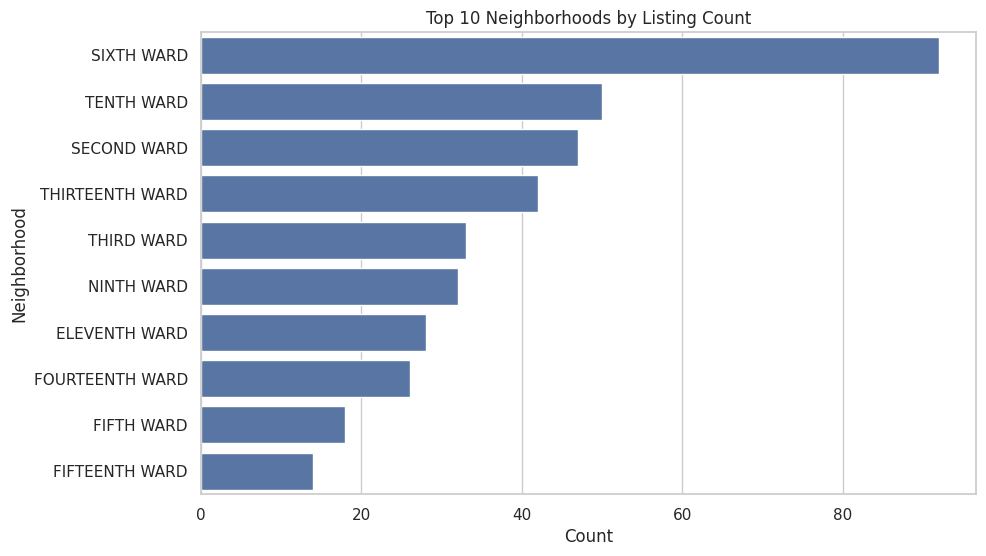

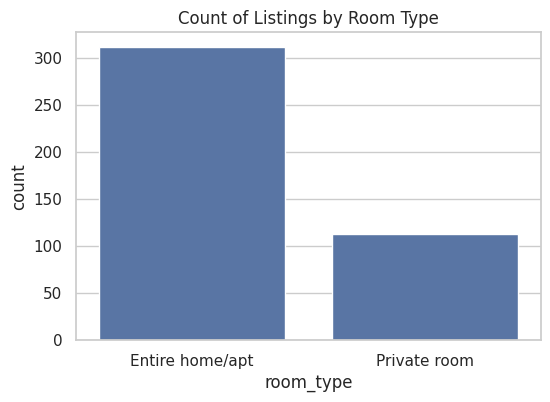

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(y='neighbourhood_cleansed', data=df, order=df['neighbourhood_cleansed'].value_counts().index[:10])
plt.title("Top 10 Neighborhoods by Listing Count")
plt.xlabel("Count")
plt.ylabel("Neighborhood")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='room_type', data=df)
plt.title("Count of Listings by Room Type")
plt.show()


(d) Correlations between variables

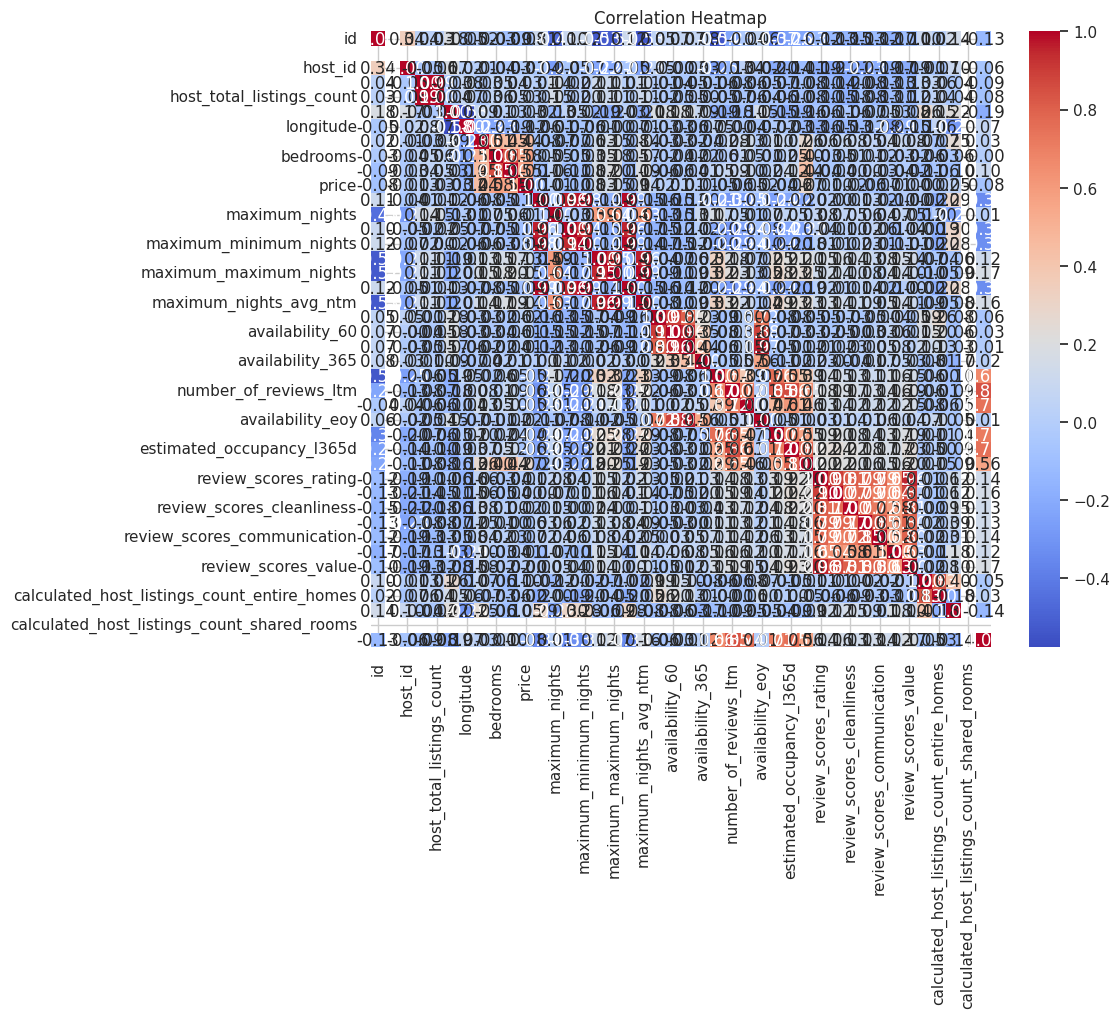

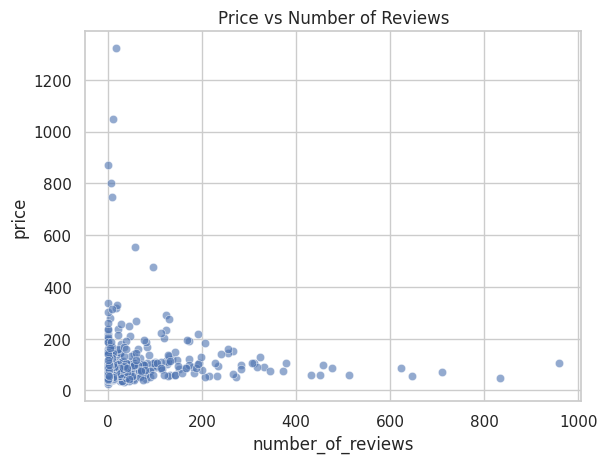

In [9]:
# Select relevant numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Correlation matrix
corr = df[num_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Example correlation insight: Price vs. Number of Reviews
sns.scatterplot(x='number_of_reviews', y='price', data=df, alpha=0.6)
plt.title("Price vs Number of Reviews")
plt.show()


4. Observations & Key Insights

Entire homes command higher prices than private rooms.

Weak negative correlation between price and number of reviews.

Review activity concentrated in certain areas, suggesting higher demand zones.

In [11]:
df.to_csv("cleaned_listings.csv", index=False)
print(" Cleaned dataset saved successfully.")


 Cleaned dataset saved successfully.


Part 2: Key Insights and Business Questions

In [12]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob  # for sentiment analysis

# Load the cleaned dataset
df = pd.read_csv("cleaned_listings.csv")

sns.set(style="whitegrid", palette="pastel")


1. Pricing Analysis

(a) Price ranges by neighborhood

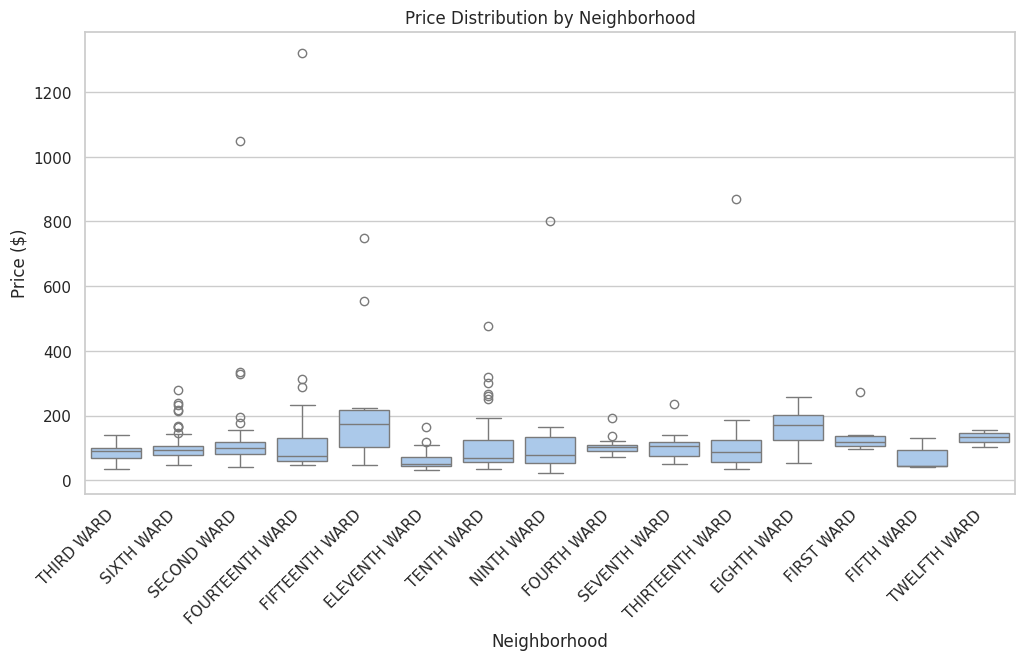

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='neighbourhood_cleansed', y='price')
plt.xticks(rotation=45, ha='right')
plt.title("Price Distribution by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Price ($)")
plt.show()


Identify which neighborhoods show higher median prices or wide variability‚Äîthese often reflect premium areas or high-demand zones.

(b) Price ranges by room type

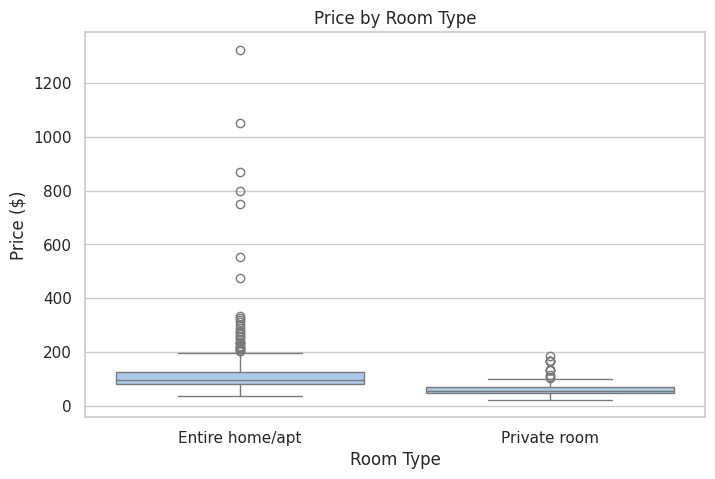

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='room_type', y='price')
plt.title("Price by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Price ($)")
plt.show()


Entire homes/apartments tend to be significantly more expensive than private or shared rooms.

(c) Impact of reviews on price

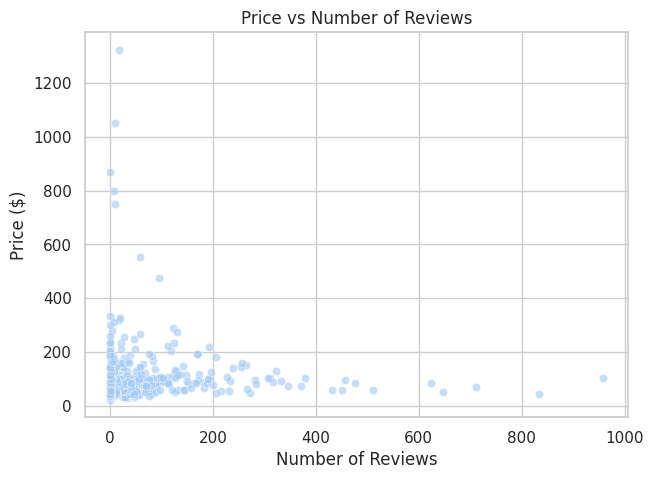

Correlation between price and number of reviews: -0.05


In [15]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='number_of_reviews', y='price', data=df, alpha=0.6)
plt.title("Price vs Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Price ($)")
plt.show()

corr_val = df['number_of_reviews'].corr(df['price'])
print(f"Correlation between price and number of reviews: {corr_val:.2f}")


A weak or negative correlation often means cheaper listings attract more reviews, while premium properties get fewer but more exclusive stays.

2. Location Insights

(a) Top-rated neighborhoods

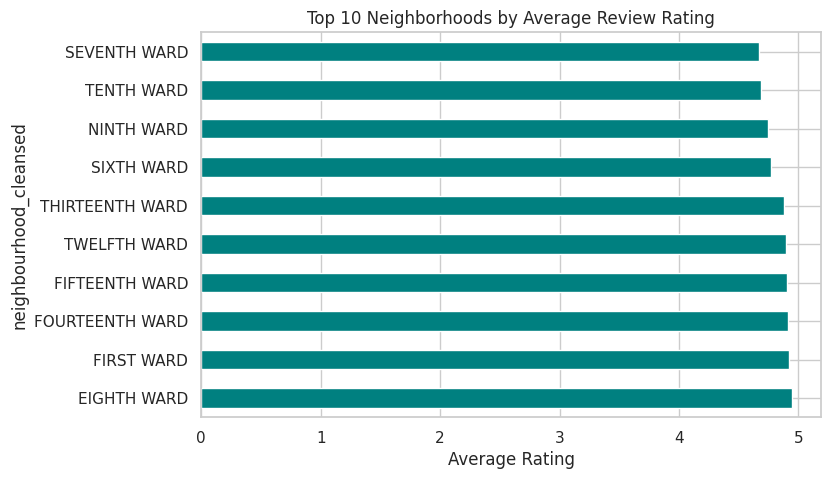

In [16]:
if 'review_scores_rating' in df.columns:
    top_rated = (df.groupby('neighbourhood_cleansed')['review_scores_rating']
                   .mean()
                   .sort_values(ascending=False)
                   .head(10))
    top_rated.plot(kind='barh', figsize=(8,5), color='teal')
    plt.title("Top 10 Neighborhoods by Average Review Rating")
    plt.xlabel("Average Rating")
    plt.show()
else:
    print("No review_scores_rating column found.")


(b) Neighborhoods with highest number of listings

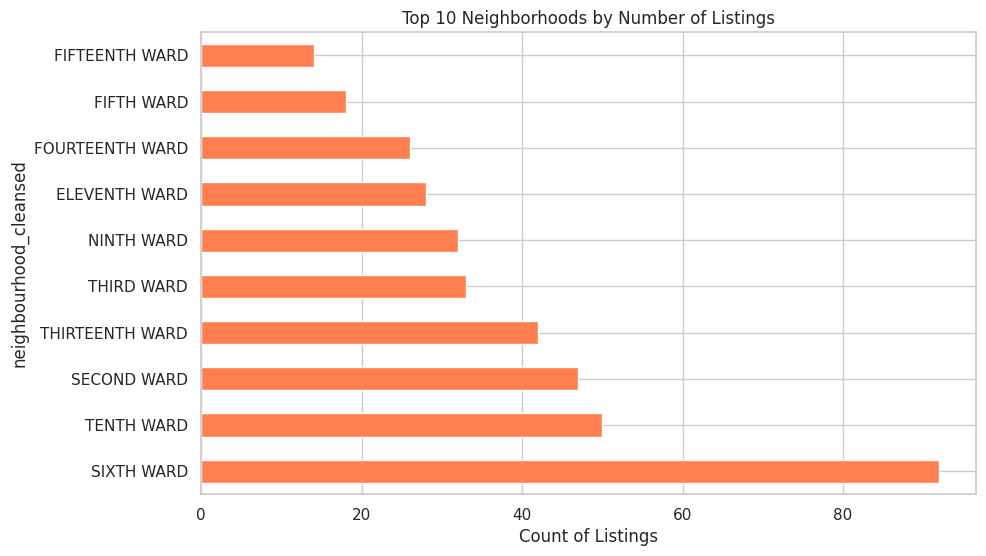

In [17]:
plt.figure(figsize=(10,6))
(df['neighbourhood_cleansed']
     .value_counts()
     .head(10)
     .plot(kind='barh', color='coral'))
plt.title("Top 10 Neighborhoods by Number of Listings")
plt.xlabel("Count of Listings")
plt.show()


Neighborhoods with both high listing count and high ratings indicate strong, established markets.
Areas with high count but low rating may signal oversupply or quality issues.

3. Room Type and Availability

(a) Availability vs Price

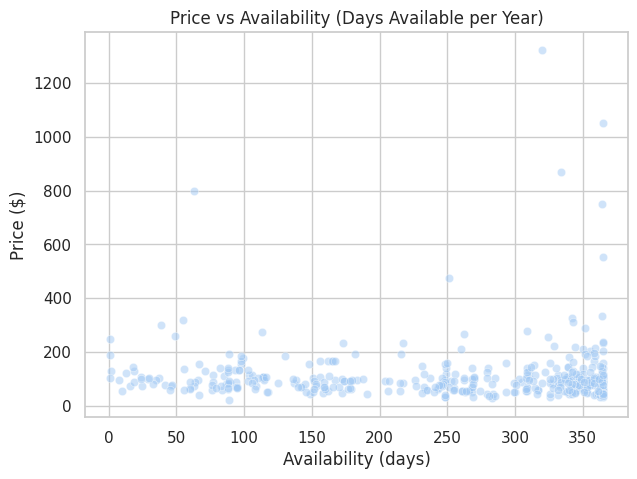

Correlation: 0.006429062184509532


In [18]:
if 'availability_365' in df.columns:
    plt.figure(figsize=(7,5))
    sns.scatterplot(x='availability_365', y='price', data=df, alpha=0.5)
    plt.title("Price vs Availability (Days Available per Year)")
    plt.xlabel("Availability (days)")
    plt.ylabel("Price ($)")
    plt.show()

    print("Correlation:",
          df['price'].corr(df['availability_365']))
else:
    print("availability_365 column not found.")


A negative correlation suggests highly-priced listings are booked (less available) most of the year.

(b) Popularity of room types

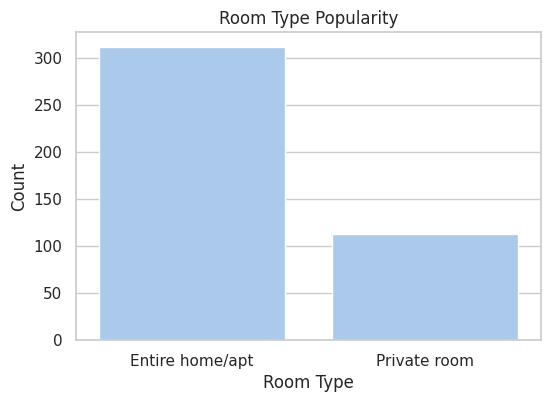

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(x='room_type', data=df, order=df['room_type'].value_counts().index)
plt.title("Room Type Popularity")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.show()


(c) Average price by room type

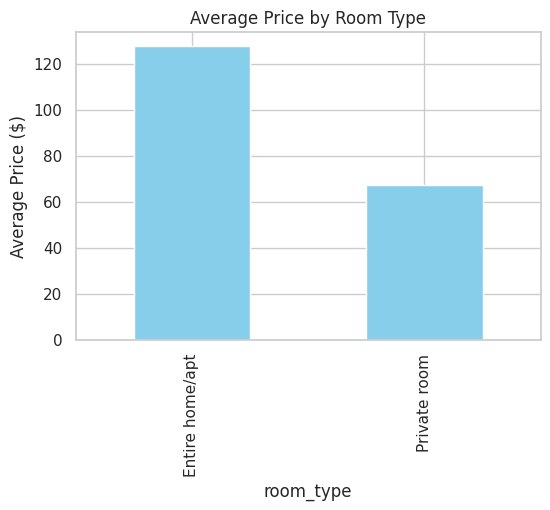

In [20]:
avg_price_rt = df.groupby('room_type')['price'].mean().sort_values(ascending=False)
avg_price_rt.plot(kind='bar', color='skyblue', figsize=(6,4))
plt.title("Average Price by Room Type")
plt.ylabel("Average Price ($)")
plt.show()


Entire homes/apartments dominate in revenue; private rooms are most numerous and budget-friendly.

4. Sentiment Analysis (from Reviews)

(a) Load and clean reviews

In [21]:
reviews = pd.read_csv("reviews.csv")   # columns: listing_id, date, reviewer_id, comments
print("Shape:", reviews.shape)
display(reviews.head())


Shape: (27355, 6)


listing_id        id        date  reviewer_id reviewer_name  \
0     2992450  15066586  2014-07-01     16827297       Kristen   
1     2992450  21810844  2014-10-24     22648856   Christopher   
2     2992450  27434334  2015-03-04        45406         Altay   
3     2992450  28524578  2015-03-25      5485362          John   
4     2992450  35913434  2015-06-23     15772025      Jennifer   

                                            comments  
0  Large apartment; nice kitchen and bathroom. Ke...  
1  This may be a little late, but just to say Ken...  
2  The apartment was very clean and convenient to...  
3  Kenneth was ready when I got there and arrange...  
4  We were pleased to see how 2nd Street and the ...

(b) Compute sentiment polarity

In [22]:
def get_sentiment(text):
    if pd.isna(text):
        return 0
    return TextBlob(str(text)).sentiment.polarity

reviews['sentiment'] = reviews['comments'].apply(get_sentiment)
print("Sentiment summary:\n", reviews['sentiment'].describe())


Sentiment summary:
 count    27355.000000
mean         0.430944
std          0.238485
min         -1.000000
25%          0.283146
50%          0.408333
75%          0.565000
max          1.000000
Name: sentiment, dtype: float64


(c) Average sentiment by neighborhood

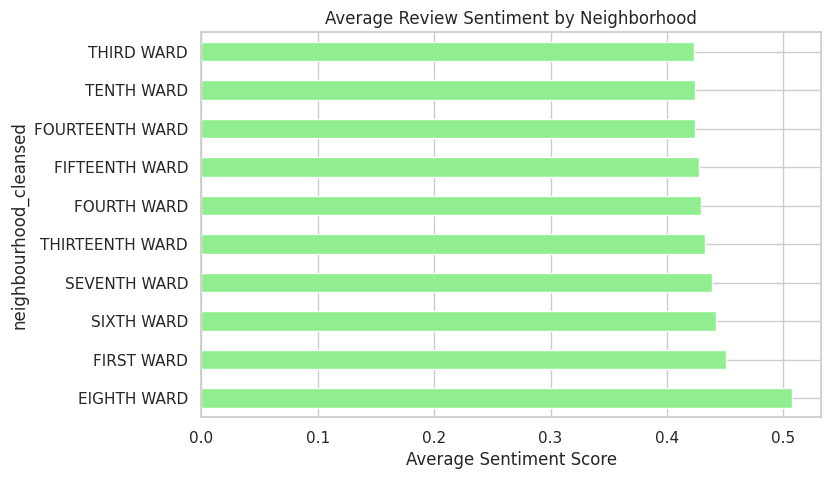

In [23]:
# Merge reviews with listings to get neighborhood info
rev_merged = reviews.merge(df[['id','neighbourhood_cleansed','room_type']], left_on='listing_id', right_on='id', how='left')

sentiment_neigh = rev_merged.groupby('neighbourhood_cleansed')['sentiment'].mean().sort_values(ascending=False)
sentiment_neigh.head(10).plot(kind='barh', color='lightgreen', figsize=(8,5))
plt.title("Average Review Sentiment by Neighborhood")
plt.xlabel("Average Sentiment Score")
plt.show()


(d) Sentiment by room type

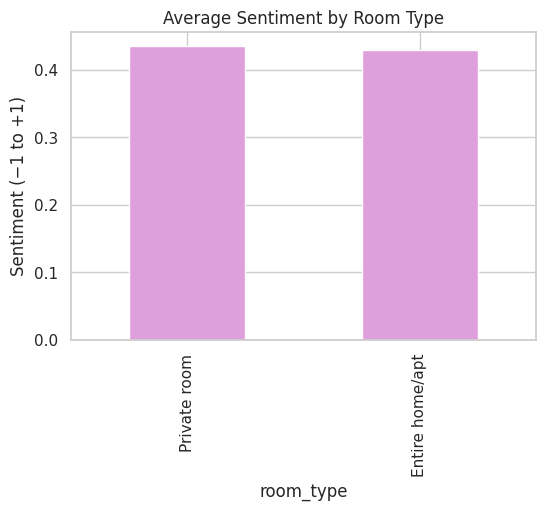

In [24]:
sentiment_room = rev_merged.groupby('room_type')['sentiment'].mean().sort_values(ascending=False)
sentiment_room.plot(kind='bar', color='plum', figsize=(6,4))
plt.title("Average Sentiment by Room Type")
plt.ylabel("Sentiment (‚àí1 to +1)")
plt.show()


Sentiment > 0 ‚Üí overall positive tone; < 0 ‚Üí negative.

Neighborhoods or room types with consistently higher sentiment reflect better guest satisfaction.

In [29]:
!pip install streamlit

Part 3: Dashboard Development

2025-10-17 11:47:35.588 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-17 11:47:35.589 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-17 11:47:35.590 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-17 11:47:35.591 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-17 11:47:35.592 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-17 11:47:35.593 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-17 11:47:35.593 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-17 11:47:35.594 No runtime found, using MemoryCacheStorageManager
2025-10-17 11:47:35.597 No runtime found, us

False

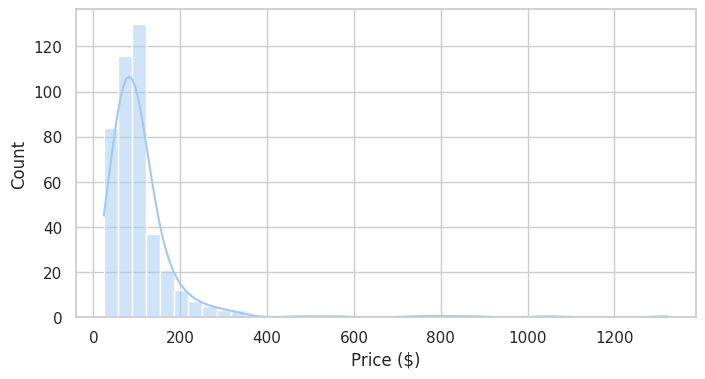

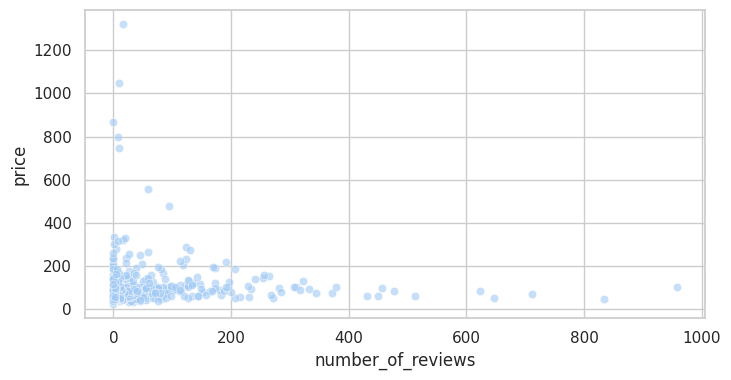

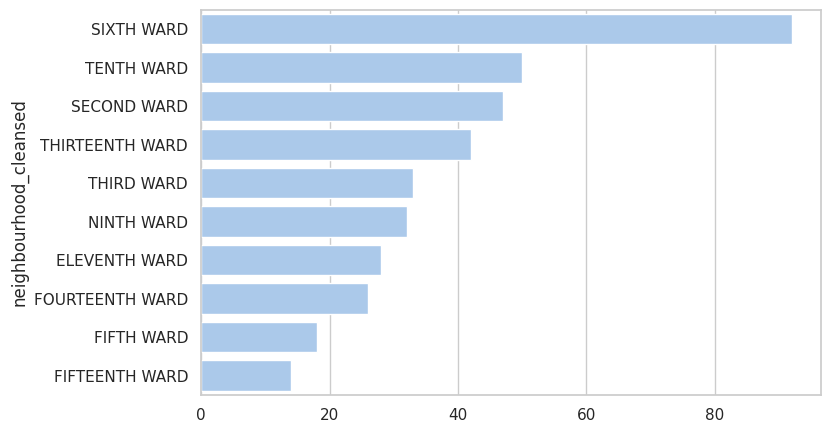

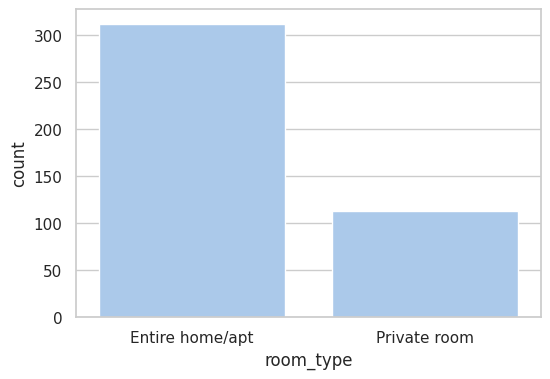

In [28]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Streamlit page setup
st.set_page_config(page_title="Airbnb Data Dashboard", layout="wide")
st.title("üè† Airbnb Data Dashboard")
st.caption("Interactive analysis of Airbnb listings (no calendar data ‚Äî availability estimated via availability_365 if present).")

# Load data
@st.cache_data
def load_data():
    listings = pd.read_csv("/content/listings.csv")
    # Clean price column
    if 'price' in listings.columns:
        listings['price'] = pd.to_numeric(listings['price'].astype(str)
                                          .str.replace(r'\$', '', regex=True)
                                          .str.replace(',', '', regex=True), errors='coerce')
    # Add occupancy proxy
    if 'availability_365' in listings.columns:
        listings['occupancy_rate'] = 1 - (listings['availability_365'] / 365)
    else:
        listings['occupancy_rate'] = np.nan
    return listings

listings = load_data()
sns.set(style="whitegrid", palette="pastel")

# Sidebar filters
st.sidebar.header("üîç Filters")
neighborhoods = listings['neighbourhood_cleansed'].dropna().unique() if 'neighbourhood_cleansed' in listings.columns else []
room_types = listings['room_type'].dropna().unique() if 'room_type' in listings.columns else []

selected_neighborhood = st.sidebar.multiselect("Select Neighborhood(s)", sorted(neighborhoods))
selected_room_type = st.sidebar.multiselect("Select Room Type(s)", sorted(room_types))
price_range = st.sidebar.slider("Price Range ($)", int(listings['price'].min()), int(listings['price'].max()), (int(listings['price'].min()), int(listings['price'].max())))
min_reviews = st.sidebar.slider("Minimum Number of Reviews", 0, int(listings['number_of_reviews'].max() if 'number_of_reviews' in listings.columns else 100), 0)

# Filter data
filtered = listings.copy()
if selected_neighborhood:
    filtered = filtered[filtered['neighbourhood_cleansed'].isin(selected_neighborhood)]
if selected_room_type:
    filtered = filtered[filtered['room_type'].isin(selected_room_type)]
filtered = filtered[(filtered['price'] >= price_range[0]) & (filtered['price'] <= price_range[1])]
if 'number_of_reviews' in filtered.columns:
    filtered = filtered[filtered['number_of_reviews'] >= min_reviews]

# KPI Metrics
col1, col2, col3 = st.columns(3)
col1.metric("Average Price ($)", f"{filtered['price'].mean():.2f}")
col2.metric("Average Occupancy Rate", f"{filtered['occupancy_rate'].mean() * 100 if not filtered['occupancy_rate'].isna().all() else 0:.1f}%")
col3.metric("Total Listings", len(filtered))

# Visualization Tabs
tabs = st.tabs(["üìä Pricing & Distribution", "üìç Location Insights", "üè† Room Type Analysis", "üí¨ Sentiment & ML"])

# --- Pricing & Distribution ---
with tabs[0]:
    st.subheader("Price Distribution")
    fig, ax = plt.subplots(figsize=(8,4))
    sns.histplot(filtered['price'], bins=40, kde=True, ax=ax)
    ax.set_xlabel('Price ($)')
    st.pyplot(fig)

    if 'number_of_reviews' in filtered.columns:
        st.subheader("Price vs Number of Reviews")
        fig, ax = plt.subplots(figsize=(8,4))
        sns.scatterplot(data=filtered, x='number_of_reviews', y='price', alpha=0.6, ax=ax)
        st.pyplot(fig)

# --- Location Insights ---
with tabs[1]:
    st.subheader("Top Neighborhoods by Listings")
    if 'neighbourhood_cleansed' in filtered.columns:
        neigh_count = filtered['neighbourhood_cleansed'].value_counts().head(10)
        fig, ax = plt.subplots(figsize=(8,5))
        sns.barplot(x=neigh_count.values, y=neigh_count.index, ax=ax)
        st.pyplot(fig)

# --- Room Type Analysis ---
with tabs[2]:
    if 'room_type' in filtered.columns:
        st.subheader("Room Type Popularity")
        fig, ax = plt.subplots(figsize=(6,4))
        sns.countplot(x='room_type', data=filtered, ax=ax)
        st.pyplot(fig)

        st.subheader("Average Price by Room Type")
        avg_price_rt = filtered.groupby('room_type')['price'].mean().sort_values(ascending=False)
        st.bar_chart(avg_price_rt)

# --- Sentiment & ML ---
with tabs[3]:
    st.subheader("Optional: Sentiment Analysis (Requires reviews.csv)")
    if st.checkbox("Run sentiment analysis on reviews.csv"):
        try:
            reviews = pd.read_csv("data/reviews.csv")
            reviews['sentiment'] = reviews['comments'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)
            merged = reviews.merge(listings[['id','neighbourhood_cleansed','room_type']], left_on='listing_id', right_on='id', how='left')
            sentiment_avg = merged.groupby('room_type')['sentiment'].mean()
            st.bar_chart(sentiment_avg)
        except Exception as e:
            st.error(f"Error loading reviews.csv: {e}")

    st.divider()

    st.subheader("üí° Predict Price (Simple ML Model)")
    if st.checkbox("Train and Predict using Linear Regression"):
        numeric_cols = ['number_of_reviews', 'availability_365']
        features = [col for col in numeric_cols if col in listings.columns]
        if 'price' in listings.columns and features:
            model_df = listings[features + ['price']].dropna()
            X = model_df[features]
            y = model_df['price']
            model = LinearRegression().fit(X, y)
            st.success("Model trained successfully!")
            sample = {}
            for f in features:
                sample[f] = st.number_input(f"Enter {f}", float(X[f].min()), float(X[f].max()), float(X[f].mean()))
            sample_df = pd.DataFrame([sample])
            pred = model.predict(sample_df)[0]
            st.info(f"Predicted Price: ${pred:.2f}")

# Export data
st.download_button("üì§ Export Filtered Data (CSV)", data=filtered.to_csv(index=False), file_name="filtered_airbnb_data.csv", mime="text/csv")